Memprediksi Tren Volume Impor Non Migas Indonesia dengan Metode Monte Carlo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. Memuat dan Membersihkan Data

In [ ]:
df = pd.read_excel('Import-NonMigas.xlsx')

In [ ]:
#Mengganti Nama Kolom
df.columns = ['Komponen', '2022', '2023']

In [ ]:
# Menghapus baris yang tidak diperlukan
df = df.drop([0, 1, 14]).reset_index(drop=True)

In [ ]:
print("Data yang sudah dibersihkan:")
print(df)

Data yang sudah dibersihkan:
     Komponen     2022     2023
0     Januari  15981.9  15536.8
1    Februari  13736.2  13512.7
2       Maret  18470.2  17573.3
3       April  15943.6  12392.6
4         Mei  15255.6  18144.5
5        Juni  17330.9  14928.2
6        Juli  16889.7  16438.2
7     Agustus  18449.2  16217.8
8   September  16382.2  14013.0
9     Oktober  15771.3  15466.1
10   November  16157.9  16097.8
11   Desember  16662.1  15734.3


2. Menetapkan Distribusi Probabilitas

In [ ]:
total_2022 = df['2022'].sum()
df['DP_2022'] = df['2022'] / total_2022

print("Distribusi Probabilitas untuk Tahun 2022:")
print(df[['Komponen', 'DP_2022']])

Distribusi Probabilitas untuk Tahun 2022:
     Komponen   DP_2022
0     Januari  0.081114
1    Februari  0.069716
2       Maret  0.093743
3       April  0.080919
4         Mei  0.077427
5        Juni  0.087960
6        Juli  0.085721
7     Agustus  0.093636
8   September  0.083145
9     Oktober  0.080045
10   November  0.082007
11   Desember  0.084566


In [ ]:
total_2023 = df['2023'].sum()
df['DP_2023'] = df['2023'] / total_2023

print("\nDistribusi Probabilitas untuk Tahun 2023:")
print(df[['Komponen', 'DP_2023']])


Distribusi Probabilitas untuk Tahun 2023:
     Komponen   DP_2023
0     Januari  0.083506
1    Februari  0.072627
2       Maret  0.094452
3       April  0.066607
4         Mei  0.097522
5        Juni  0.080235
6        Juli  0.088351
7     Agustus  0.087167
8   September  0.075316
9     Oktober  0.083126
10   November  0.086522
11   Desember  0.084568


3. Menentukan Distribusi Probabilitas Kumulatif (DPK)

In [ ]:
df['DPK_2022'] = df['DP_2022'].cumsum()


print("Distribusi Probabilitas Kumulatif untuk Tahun 2022:")
print(df[['Komponen', 'DPK_2022']])

Distribusi Probabilitas Kumulatif untuk Tahun 2022:
     Komponen  DPK_2022
0     Januari  0.081114
1    Februari  0.150830
2       Maret  0.244572
3       April  0.325492
4         Mei  0.402919
5        Juni  0.490880
6        Juli  0.576601
7     Agustus  0.670237
8   September  0.753382
9     Oktober  0.833427
10   November  0.915434
11   Desember  1.000000


In [ ]:
df['DPK_2023'] = df['DP_2023'].cumsum()


print("\nDistribusi Probabilitas Kumulatif untuk Tahun 2023:")
print(df[['Komponen', 'DPK_2023']])


Distribusi Probabilitas Kumulatif untuk Tahun 2023:
     Komponen  DPK_2023
0     Januari  0.083506
1    Februari  0.156134
2       Maret  0.250586
3       April  0.317193
4         Mei  0.414715
5        Juni  0.494950
6        Juli  0.583301
7     Agustus  0.670468
8   September  0.745784
9     Oktober  0.828911
10   November  0.915432
11   Desember  1.000000


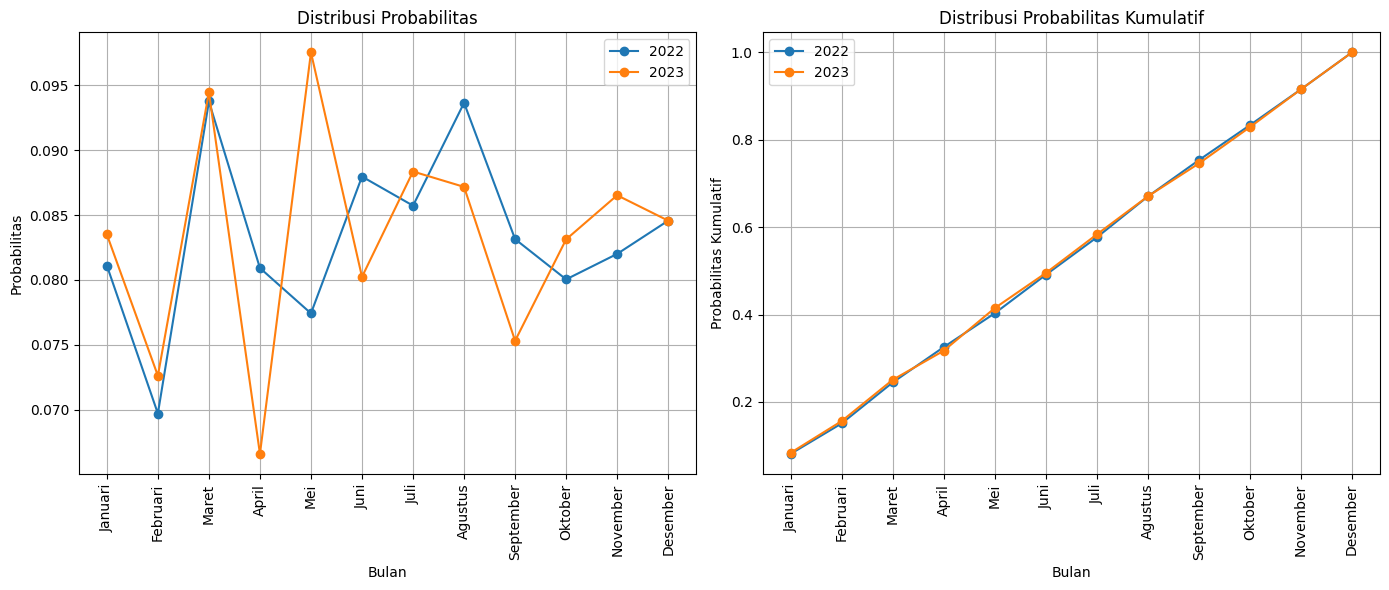

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(df['Komponen'], df['DP_2022'], marker='o', label='2022')
plt.plot(df['Komponen'], df['DP_2023'], marker='o', label='2023')
plt.xticks(rotation=90)
plt.title('Distribusi Probabilitas')
plt.xlabel('Bulan')
plt.ylabel('Probabilitas')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df['Komponen'], df['DPK_2022'], marker='o', label='2022')
plt.plot(df['Komponen'], df['DPK_2023'], marker='o', label='2023')
plt.xticks(rotation=90)
plt.title('Distribusi Probabilitas Kumulatif')
plt.xlabel('Bulan')
plt.ylabel('Probabilitas Kumulatif')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def get_random_intervals_integer(dpk):
    intervals = [(int(dpk[i-1] * 100), int(dpk[i] * 100)) for i in range(1, len(dpk))]
    intervals.insert(0, (0, int(dpk[0] * 100)))
    return intervals

intervals_2022 = get_random_intervals_integer(df['DPK_2022'])
intervals_2023 = get_random_intervals_integer(df['DPK_2023'])

# Menampilkan hasil simulasi dalam bentuk tabel dengan interval angka acak dalam bilangan bulat
result_2022 = pd.DataFrame({
    'Komponen': df['Komponen'],
    '2022': df['2022'],
    'DP_2022': df['DP_2022'],
    'DPK_2022': df['DPK_2022'],
    'Interval_2022': [f"{lower}-{upper}" for lower, upper in intervals_2022]  # Menambahkan kolom interval angka acak untuk tahun 2022
})

result_2023 = pd.DataFrame({
    'Komponen': df['Komponen'],
    '2023': df['2023'],
    'DP_2023': df['DP_2023'],
    'DPK_2023': df['DPK_2023'],
    'Interval_2023': [f"{lower}-{upper}" for lower, upper in intervals_2023]  # Menambahkan kolom interval angka acak untuk tahun 2023
})

print("\nHasil Simulasi untuk Tahun 2022:")
print(result_2022)

print("\nHasil Simulasi untuk Tahun 2023:")
print(result_2023)



Hasil Simulasi untuk Tahun 2022:
     Komponen     2022   DP_2022  DPK_2022 Interval_2022
0     Januari  15981.9  0.081114  0.081114           0-8
1    Februari  13736.2  0.069716  0.150830          8-15
2       Maret  18470.2  0.093743  0.244572         15-24
3       April  15943.6  0.080919  0.325492         24-32
4         Mei  15255.6  0.077427  0.402919         32-40
5        Juni  17330.9  0.087960  0.490880         40-49
6        Juli  16889.7  0.085721  0.576601         49-57
7     Agustus  18449.2  0.093636  0.670237         57-67
8   September  16382.2  0.083145  0.753382         67-75
9     Oktober  15771.3  0.080045  0.833427         75-83
10   November  16157.9  0.082007  0.915434         83-91
11   Desember  16662.1  0.084566  1.000000        91-100

Hasil Simulasi untuk Tahun 2023:
     Komponen     2023   DP_2023  DPK_2023 Interval_2023
0     Januari  15536.8  0.083506  0.083506           0-8
1    Februari  13512.7  0.072627  0.156134          8-15
2       Maret  17573

In [ ]:
# Menentukan konstanta untuk LCG
a = 23  # konstanta pengali (a < M)
c = 17  # konstanta pergeseran (c < M)
m = 100  # konstanta modulus (M > 0)
Z0 = 42  # Nilai awal (bilangan bulat ≥ 0, W0 < M)

# Fungsi untuk menghasilkan angka acak menggunakan LCG
def generate_random_numbers(a, c, m, Z0, n):
    random_numbers = []
    Zi = Z0
    for i in range(n):
        Zi = (a * Zi + c) % m
        random_numbers.append(Zi)
    return random_numbers

# Membangkitkan 12 angka acak (Z1 hingga Z12)
random_numbers = generate_random_numbers(a, c, m, Z0, 12)

# Menampilkan hasil angka acak
print("Angka Acak yang Dihasilkan:")
for i, num in enumerate(random_numbers, start=1):
    print(f"Z{i}: {num}")


Angka Acak yang Dihasilkan:
Z1: 83
Z2: 26
Z3: 15
Z4: 62
Z5: 43
Z6: 6
Z7: 55
Z8: 82
Z9: 3
Z10: 86
Z11: 95
Z12: 2


In [ ]:
def monte_carlo_simulation(random_numbers, intervals):
    simulation_results = []
    for number in random_numbers:
        for i, (lower, upper) in enumerate(intervals):
            if lower <= number < upper:
                simulation_results.append(i)
                break
    return simulation_results

# Menjalankan simulasi untuk tahun 2022
simulation_2022 = monte_carlo_simulation(random_numbers, intervals_2022)
simulated_values_2022 = [df['2022'][i] for i in simulation_2022]

# Menjalankan simulasi untuk tahun 2023
simulation_2023 = monte_carlo_simulation(random_numbers, intervals_2023)
simulated_values_2023 = [df['2023'][i] for i in simulation_2023]

result_2022 = pd.DataFrame({
    'Komponen': df['Komponen'],
    '2022': simulated_values_2022
})

result_2023 = pd.DataFrame({
    'Komponen': df['Komponen'],
    '2023': simulated_values_2023
})

print("\nHasil Simulasi untuk Tahun 2022:")
print(result_2022)

print("\nHasil Simulasi untuk Tahun 2023:")
print(result_2023)


Hasil Simulasi untuk Tahun 2022:
     Komponen     2022
0     Januari  16157.9
1    Februari  15943.6
2       Maret  18470.2
3       April  18449.2
4         Mei  17330.9
5        Juni  15981.9
6        Juli  16889.7
7     Agustus  15771.3
8   September  15981.9
9     Oktober  16157.9
10   November  16662.1
11   Desember  15981.9

Hasil Simulasi untuk Tahun 2023:
     Komponen     2023
0     Januari  16097.8
1    Februari  12392.6
2       Maret  17573.3
3       April  16217.8
4         Mei  14928.2
5        Juni  15536.8
6        Juli  16438.2
7     Agustus  16097.8
8   September  15536.8
9     Oktober  16097.8
10   November  15734.3
11   Desember  15536.8


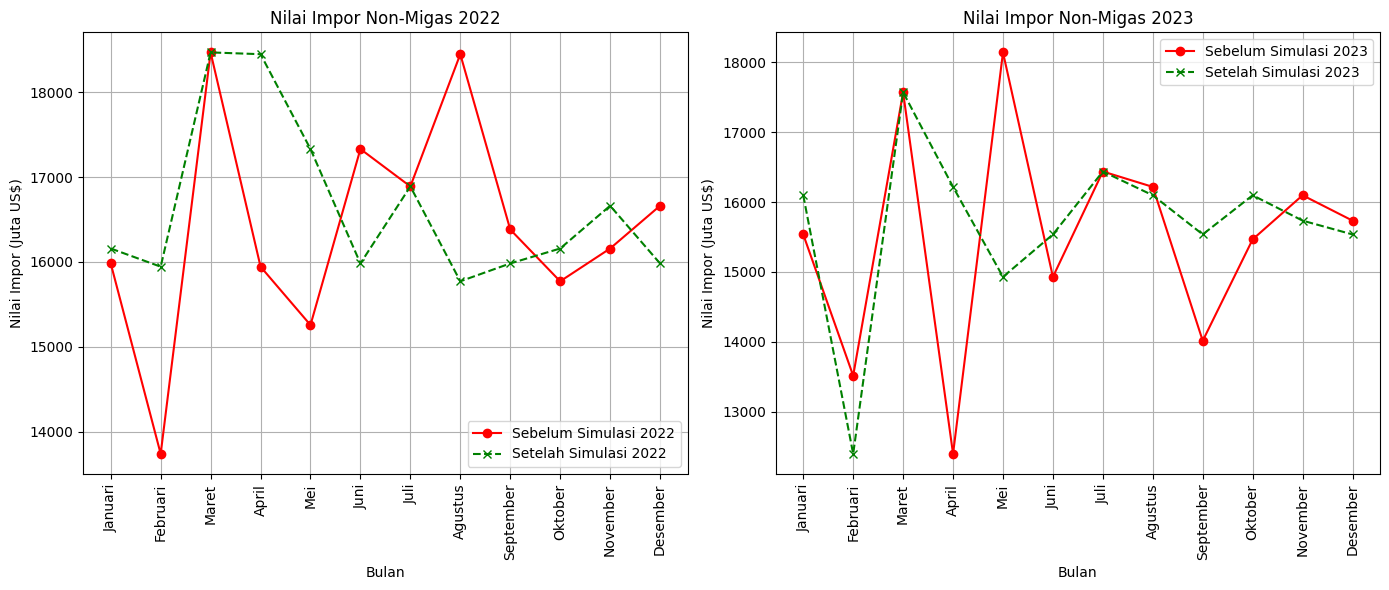

In [ ]:
# Plotting hasil sebelum dan setelah simulasi
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(df['Komponen'], df['2022'], marker='o', color='red', label='Sebelum Simulasi 2022')
plt.plot(df['Komponen'], result_2022['2022'], marker='x', linestyle='--', color='green', label='Setelah Simulasi 2022')
plt.xticks(rotation=90)
plt.title('Nilai Impor Non-Migas 2022')
plt.xlabel('Bulan')
plt.ylabel('Nilai Impor (Juta US$)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df['Komponen'], df['2023'], marker='o', color='red', label='Sebelum Simulasi 2023')
plt.plot(df['Komponen'], result_2023['2023'], marker='x', linestyle='--', color='green', label='Setelah Simulasi 2023')
plt.xticks(rotation=90)
plt.title('Nilai Impor Non-Migas 2023')
plt.xlabel('Bulan')
plt.ylabel('Nilai Impor (Juta US$)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
